#**데이터 확인 및 처리**

In [1]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/trade_data_analysis')

Mounted at /content/drive


**1번 데이터** : 광종별 소비현황 (알류미늄, 카드뮴, 동, 연, 니켈, 주석,아연)

**2번 데이터** : 2020 ~ 2021 국가별 광종 수출입 현황(중량 및 금액)

**3번 데이터** : 2020 ~ 2021 국내 수출입 현황(중량 및 금액)

**4번 데이터** : 광종별 국가별 생산량

In [3]:
# 파일을 cp949 인코딩 방식으로 읽습니다.
Consumption = pd.read_csv('광종별 소비현황.csv', encoding='cp949') # 2011 ~ 2022 소비량 : 17 colums
WIE = pd.read_csv('광종 수출입 현황.csv', encoding='cp949') # 2020 ~ 2021 수출입 중량/금액 : 7 colums
KIE = pd.read_csv('국내 수출입 현황.csv', encoding='cp949') # 2020 ~ 2021 수출입 중량/금액 : 7 colums
Output = pd.read_csv('광종별 국가별 생산량.csv', encoding='cp949') # 2011 ~ 2022 생산량: 17 colums

#**결측치 정리**

In [4]:
# 각 데이터프레임에서 결측치 여부를 확인합니다.
consumption_missing = Consumption.isna().sum()
wie_missing = WIE.isna().sum()
kie_missing = KIE.isna().sum()
output_missing = Output.isna().sum()

print("광종별 소비현황 결측치:")
print(consumption_missing)
print("\n광종 수출입 현황 결측치:")
print(wie_missing)
print("\n국내 수출입 현황 결측치:")
print(kie_missing)
print("\n광종별 국가별 생산량 결측치:")
print(output_missing)

광종별 소비현황 결측치:
광종          0
품목          0
대륙          0
국가          0
단위          0
2011 소비량    1
2012 소비량    0
2013 소비량    0
2014 소비량    0
2015 소비량    0
2016 소비량    0
2017 소비량    0
2018 소비량    0
2019 소비량    0
2020 소비량    0
2021 소비량    0
2022 소비량    0
dtype: int64

광종 수출입 현황 결측치:
기간            0
품목명           0
국가명           0
수출중량(톤)     218
수출금액(천불)    218
수입중량(톤)     216
수입금액(천불)    214
dtype: int64

국내 수출입 현황 결측치:
연도          0
분류          0
광종          0
수출중량(톤)     0
수출금액(천불)    0
수입중량(톤)     0
수입금액(천불)    0
dtype: int64

광종별 국가별 생산량 결측치:
광종          0
품목          0
대륙          0
국가          0
단위          0
2011 생산량    5
2012 생산량    0
2013 생산량    0
2014 생산량    0
2015 생산량    0
2016 생산량    0
2017 생산량    0
2018 생산량    0
2019 생산량    0
2020 생산량    1
2021 생산량    0
2022 생산량    0
dtype: int64


**1. 광종별 소비현황(Consumption)** : 하나의 결측치 --> 중앙값

**2. 광종 수출입 현황(WIE)** : 확인 결과 비어있는 행 --> 행 제거

**3. 국내 수출입 현황(KIE)** : 결측값 없음

**4. 광종별 국가별 생산량(Output)** : 평균값으로 대체

In [5]:
# 광종별 소비현황 결측치 처리: 중앙값으로 대체
Consumption['2011 소비량'].fillna(Consumption['2011 소비량'].median(), inplace=True)

# 광종 수출입 현황 결측치 처리: 행 제거
WIE.dropna(inplace=True)

# 광종별 국가별 생산량 결측치 처리: 평균값으로 대체
mean_2011 = Output['2011 생산량'].mean()
mean_2020 = Output['2020 생산량'].mean()
Output['2011 생산량'].fillna(mean_2011, inplace=True)
Output['2020 생산량'].fillna(mean_2020, inplace=True)

# 각 파일의 결측치 상태를 확인합니다.
print("광종별 소비현황 결측치:\n", Consumption.isnull().sum())
print("\n광종 수출입 현황 결측치:\n", WIE.isnull().sum())
print("\n국내 수출입 현황 결측치:\n", KIE.isnull().sum())
print("\n광종별 국가별 생산량 결측치:\n", Output.isnull().sum())

광종별 소비현황 결측치:
 광종          0
품목          0
대륙          0
국가          0
단위          0
2011 소비량    0
2012 소비량    0
2013 소비량    0
2014 소비량    0
2015 소비량    0
2016 소비량    0
2017 소비량    0
2018 소비량    0
2019 소비량    0
2020 소비량    0
2021 소비량    0
2022 소비량    0
dtype: int64

광종 수출입 현황 결측치:
 기간          0
품목명         0
국가명         0
수출중량(톤)     0
수출금액(천불)    0
수입중량(톤)     0
수입금액(천불)    0
dtype: int64

국내 수출입 현황 결측치:
 연도          0
분류          0
광종          0
수출중량(톤)     0
수출금액(천불)    0
수입중량(톤)     0
수입금액(천불)    0
dtype: int64

광종별 국가별 생산량 결측치:
 광종          0
품목          0
대륙          0
국가          0
단위          0
2011 생산량    0
2012 생산량    0
2013 생산량    0
2014 생산량    0
2015 생산량    0
2016 생산량    0
2017 생산량    0
2018 생산량    0
2019 생산량    0
2020 생산량    0
2021 생산량    0
2022 생산량    0
dtype: int64


#**소비량/생산량 비교**

In [6]:
# 열 이름에서 '소비량' 이 포함된 열만 선택
Consumption_year = Consumption.filter(regex='(광종|소비량)')
# '광종'을 기준으로 그룹화하고 각 그룹에 대해 년도별 소비량의 합을 계산
Consumption_year_grouped = Consumption_year.groupby('광종').sum()

In [7]:
# '광종' 열을 기준으로 그룹화하고, 생산량 열들을 합산하여 새로운 데이터프레임에 저장
Output_year_grouped = Output.groupby('광종').sum().iloc[:, 4:]

In [8]:
# 첫번째 열의 이름이 같은 것들만 남기기
common_indices = Consumption_year_grouped.index.intersection(Output_year_grouped.index)
Consumption_common = Consumption_year_grouped.loc[common_indices]
Output_common = Output_year_grouped.loc[common_indices]

In [9]:
# Output_year_grouped의 열 이름에서 연도만 남깁니다.
Output_common.columns = Output_common.columns.str.replace(' 생산량', '')
Consumption_common.columns = Consumption_common.columns.str.replace(' 소비량', '')
# 차
Dif = Output_common.iloc[:, 0:].astype(float) - Consumption_common.iloc[:, 0:].astype(float)

**생산량 변화**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53000 (\N{HANGUL SYLLABLE KEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

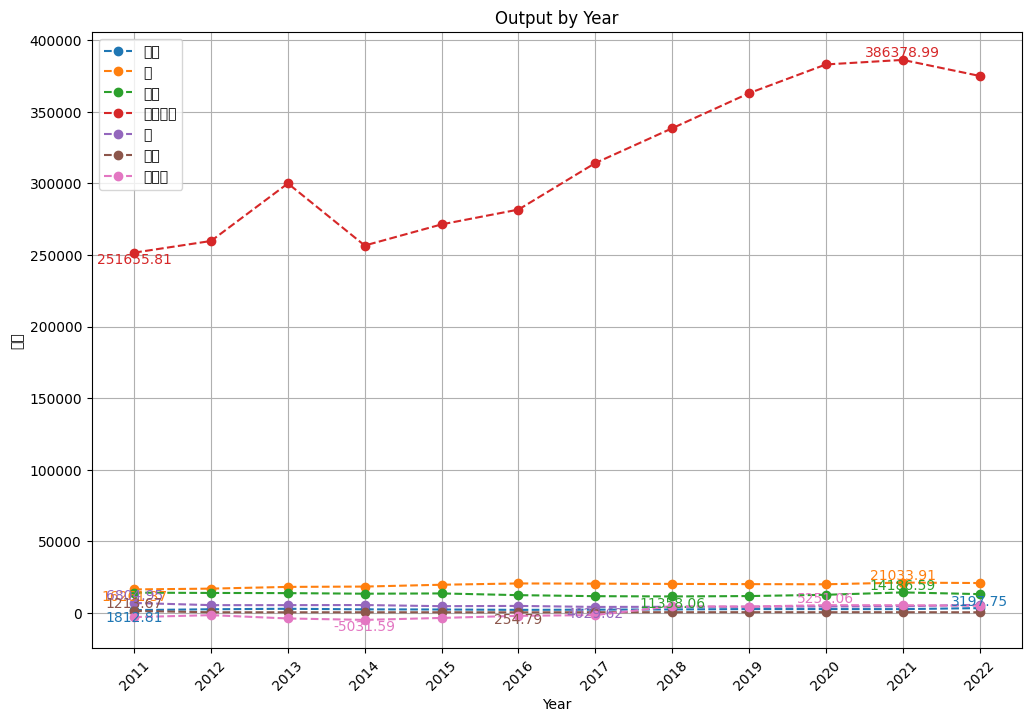

In [10]:
# 점선 그래프로 시각화
plt.figure(figsize=(12, 8))

# 각 행에 대해 점선 그래프 그리기
for index, row in Dif.iterrows():
    # 색깔 선택
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(row, linestyle='--', marker='o', label=index, color=color)

    # 최대값과 최소값 찾기
    max_value = row.max()
    min_value = row.min()

    # 최대값과 최소값 표시
    max_index = row.idxmax()
    min_index = row.idxmin()
    plt.text(max_index, max_value, f'{max_value:.2f}', horizontalalignment='center', verticalalignment='bottom', color=color)
    plt.text(min_index, min_value, f'{min_value:.2f}', horizontalalignment='center', verticalalignment='top', color=color)

plt.title('Output by Year')
plt.xlabel('Year')
plt.ylabel('변화')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**소비량 변화**

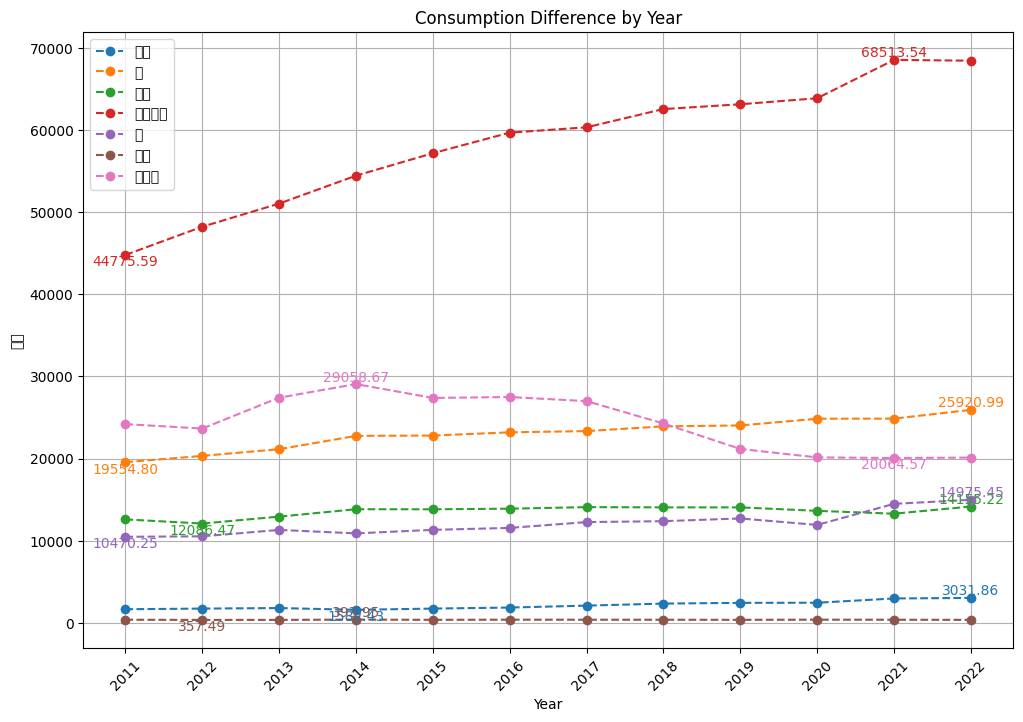

In [11]:
# 점선 그래프로 시각화
plt.figure(figsize=(12, 8))

# 각 행에 대해 점선 그래프 그리기
for index, row in Consumption_common.iterrows():
    # 색깔 선택
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(row, linestyle='--', marker='o', label=index, color=color)

    # 최대값과 최소값 찾기
    max_value = row.max()
    min_value = row.min()

    # 최대값과 최소값 표시
    max_index = row.idxmax()
    min_index = row.idxmin()
    plt.text(max_index, max_value, f'{max_value:.2f}', horizontalalignment='center', verticalalignment='bottom', color=color)
    plt.text(min_index, min_value, f'{min_value:.2f}', horizontalalignment='center', verticalalignment='top', color=color)

plt.title('Consumption Difference by Year')
plt.xlabel('Year')
plt.ylabel('변화')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**생산량 - 소비량**

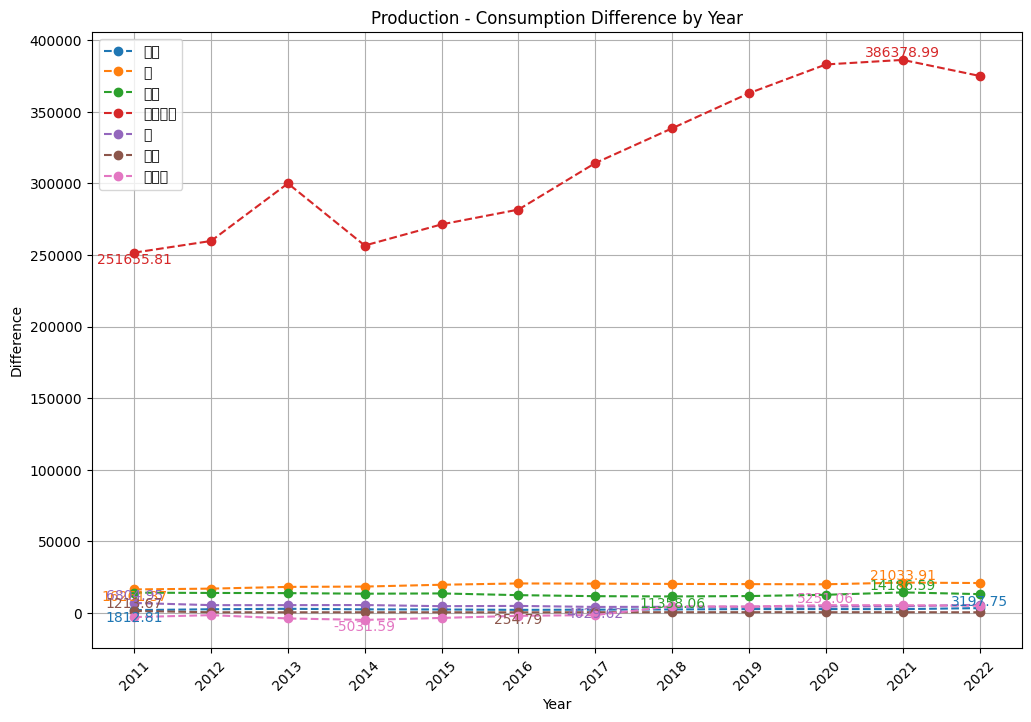

In [12]:
# 점선 그래프로 시각화
plt.figure(figsize=(12, 8))

# 각 행에 대해 점선 그래프 그리기
for index, row in Dif.iterrows():
    # 색깔 선택
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(row, linestyle='--', marker='o', label=index, color=color)

    # 최대값과 최소값 찾기
    max_value = row.max()
    min_value = row.min()

    # 최대값과 최소값 표시
    max_index = row.idxmax()
    min_index = row.idxmin()
    plt.text(max_index, max_value, f'{max_value:.2f}', horizontalalignment='center', verticalalignment='bottom', color=color)
    plt.text(min_index, min_value, f'{min_value:.2f}', horizontalalignment='center', verticalalignment='top', color=color)

plt.title('Production - Consumption Difference by Year')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**생산량-소비량(알류미늄 제외)**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53000 (\N{HANGUL SYLLABLE KEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

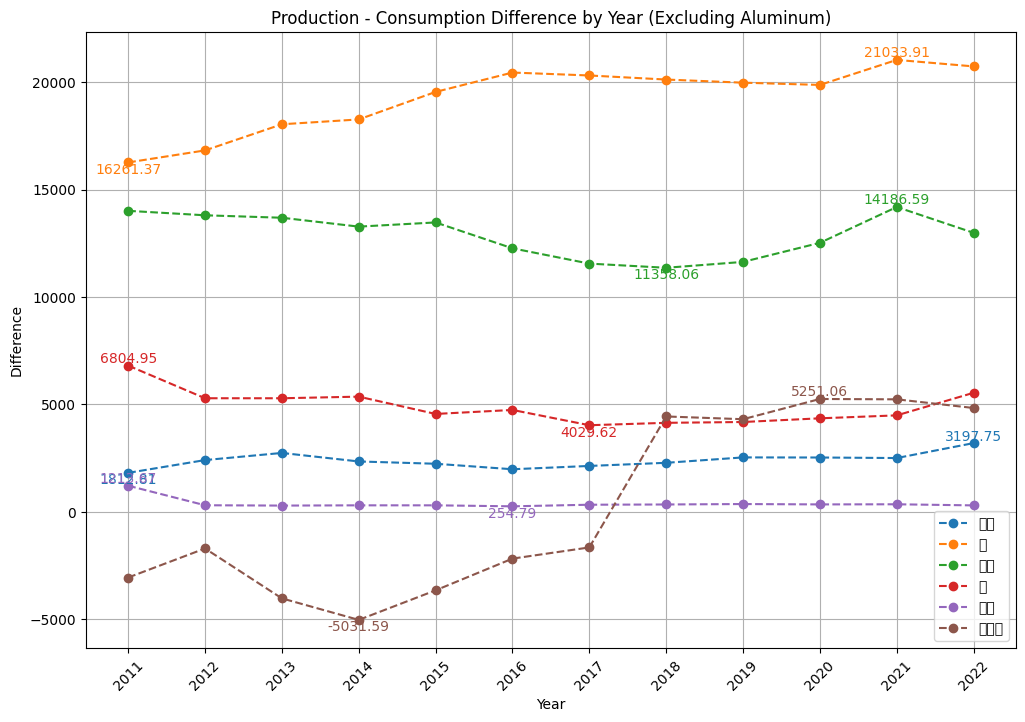

In [13]:
# 알루미늄 행 제거
Dif_excluding_aluminum = Dif.drop('알루미늄')

# 점선 그래프로 시각화
plt.figure(figsize=(12, 8))

# 각 행에 대해 점선 그래프 그리기
for index, row in Dif_excluding_aluminum.iterrows():
    # 색깔 선택
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(row, linestyle='--', marker='o', label=index, color=color)

    # 최대값과 최소값 찾기
    max_value = row.max()
    min_value = row.min()

    # 최대값과 최소값 표시
    max_index = row.idxmax()
    min_index = row.idxmin()
    plt.text(max_index, max_value, f'{max_value:.2f}', horizontalalignment='center', verticalalignment='bottom', color=color)
    plt.text(min_index, min_value, f'{min_value:.2f}', horizontalalignment='center', verticalalignment='top', color=color)

plt.title('Production - Consumption Difference by Year (Excluding Aluminum)')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()